In [51]:
 # Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\maxla\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
 # Read your api key environment variable

api_key = os.getenv('NEWS_API_KEY')

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [8]:
 # Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q='bitcoin',
    language='en'
)

# Show sample article
btc_headlines["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
 'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
 'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
 'publishedAt': '2021-02-08T14:01:09Z',
 'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'}

In [9]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q='ethereum',
    language='en'
)

# Show sample article
eth_headlines["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [10]:
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-02-08,Elon Musks cryptocurrency hype was more than j...,0.3182,0.091,0.000,0.909
1,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929
2,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962
3,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
4,2021-02-08,"Today in an SEC filing, Tesla disclosed that i...",0.6597,0.137,0.000,0.863


In [12]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.000,1.000
2,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
3,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000
4,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970


In [13]:
 # Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.199928,0.072111,0.019056,0.908778
std,0.376340,0.086707,0.035630,0.081887
min,-0.503700,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.868750
50%,0.177900,0.053500,0.000000,0.919500
75%,0.411575,0.098500,0.024000,0.957250
max,0.921700,0.353000,0.114000,1.000000


In [14]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.051300,0.005950,0.942750
std,0.274088,0.054785,0.026609,0.062097
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.900000
50%,0.012900,0.046500,0.000000,0.949500
75%,0.365100,0.082000,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    #custom stopwords
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem=[lemmatizer.lemmatize(word) for word in words]
    
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [18]:
btc_df['tokens']=btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-08,Elon Musks cryptocurrency hype was more than j...,0.3182,0.091,0.000,0.909,"[elon, musks, cryptocurrency, hype, idle, talk..."
1,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929,"[tesla, led, elon, musk, confirmed, purchased,..."
2,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962,"[brief, moment, sunday, tesla, invested, billi..."
3,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,2021-02-08,"Today in an SEC filing, Tesla disclosed that i...",0.6597,0.137,0.000,0.863,"[sec, filing, tesla, disclosed, acquired, bill..."


In [19]:
# Create a new tokens column for ethereum
eth_df['tokens']=eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.000,1.000,"[coinbase, plans, go, public, way, direct, lis..."
2,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."
3,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, et..."
4,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, christies, auction, digital, artwork, ..."


In [20]:
#NGrams and Frequency Analysis

In [87]:
from collections import Counter
from nltk import ngrams

In [88]:
lemmatizer = WordNetLemmatizer()

In [89]:
# Define preprocess function
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [95]:
#creat bigram counter function
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])


In [96]:
 # Generate the Bitcoin N-grams where N=2
bigram_counter(btc_df['text'])

,bigram,count
0,"(billion, bitcoin)",3
1,"(elon, musks)",2
2,"(elon, musk)",2
3,"(jack, dorsey)",2
4,"(jay, z)",2
5,"(popular, cryptocurrency)",2
6,"(bitcoin, future)",2
7,"(char, bitcoin)",2
8,"(alltime, high)",2
9,"(musks, cryptocurrency)",1


In [92]:
 # Generate the Ethereum N-grams where N=2
bigram_counter(eth_df['text'])

,bigram,count
0,"(record, high)",6
1,"(char, reuters)",5
2,"(feb, reuters)",5
3,"(char, new)",4
4,"(new, york)",4
5,"(photo, representation)",3
6,"(representation, ethereum)",3
7,"(ethereum, virtual)",3
8,"(virtual, currency)",3
9,"(currency, standing)",3


In [99]:
 # Use the token_count function to generate the top 10 words from each coin
def token_count(corpus, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [101]:
#poplar Ethereum tokens
token_count(eth_df['text'])

,word,count
0,chars,20
1,reuters,15
2,ethereum,13
3,cryptocurrency,7
4,bitcoin,7
5,new,6
6,record,6
7,february,5
8,feb,5
9,high,5


In [103]:
#popular BTC tokens
token_count(btc_df['text'])

,word,count
0,chars,18
1,bitcoin,12
2,cryptocurrency,8
3,tesla,6
4,elon,4
5,billion,4
6,company,4
7,musk,3
8,future,3
9,dorsey,3


In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [109]:
# Process text for wordcloud creation
btc_big_string = ' '.join(btc_df['text'])


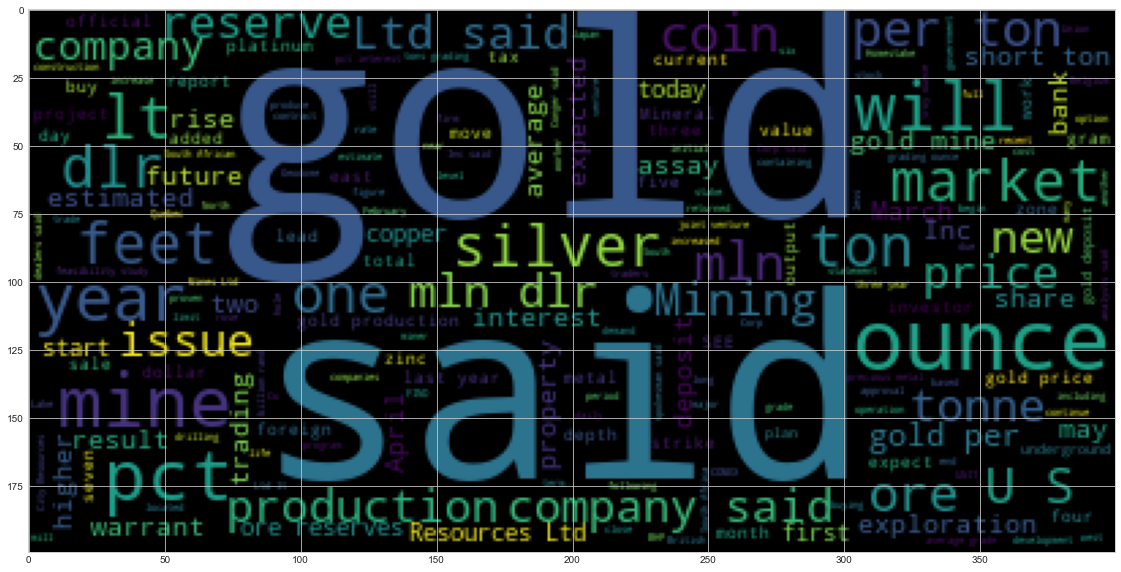

In [114]:
 # Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

In [115]:
# Process text for wordcloud creation
eth_big_string = ' '.join(eth_df['text'])


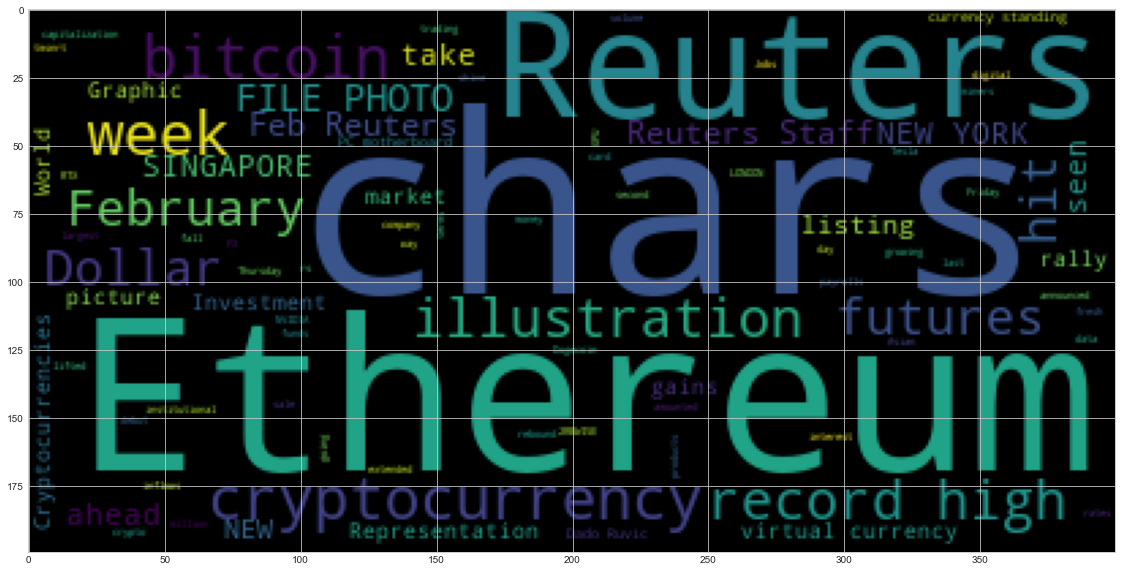

In [116]:
 # Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

In [33]:
 import spacy
from spacy import displacy

In [34]:
!python -m spacy download en_core_web_sm


    Error: Couldn't link model to 'en_core_web_sm'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    C:\Users\maxla\anaconda3\envs\dev\lib\site-packages\en_core_web_sm -->
    C:\Users\maxla\anaconda3\envs\dev\lib\site-packages\spacy\data\en_core_web_sm


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed



In [35]:
 # Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [36]:
 # Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [40]:
# Render the visualization
# YOUR CODE HERE!

In [41]:
# List all Entities
# YOUR CODE HERE!

In [42]:
# Concatenate all of the eth text together
# YOUR CODE HERE!

In [43]:
 # Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [44]:
# Render the visualization
# YOUR CODE HERE!

In [45]:
 # List all Entities
# YOUR CODE HERE!